In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import re

In [2]:
training_data = pd.read_csv('../Data/train.csv')

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [4]:
training_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
fam_count_df = pd.DataFrame(training_data.groupby('store_nbr')['family'].unique())

In [6]:
fam_count_df.head()

,family
store_nbr,
1,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO..."
2,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO..."
3,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO..."
4,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO..."
5,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO..."


In [7]:
fam_count_df['fam_count'] = fam_count_df['family'].apply(lambda x:len(x))

In [8]:
fam_count_df.sort_values(by='fam_count',ascending=False)

,family,fam_count
store_nbr,,
1,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
41,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
30,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
31,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
32,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
33,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
34,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
35,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33
36,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",33


In [9]:
store_1 = training_data[training_data['store_nbr']==1]

In [10]:
store_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55572 entries, 0 to 2999138
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.0+ MB


In [11]:
store_1.head(25)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [12]:
store_1[store_1['family']=='AUTOMOTIVE']

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0
...,...,...,...,...,...,...
2991978,2991978,2017-08-11,1,AUTOMOTIVE,1.0,0
2993760,2993760,2017-08-12,1,AUTOMOTIVE,6.0,0
2995542,2995542,2017-08-13,1,AUTOMOTIVE,1.0,0
2997324,2997324,2017-08-14,1,AUTOMOTIVE,1.0,0


In [13]:
test_data = pd.read_csv('../Data/test.csv')

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [15]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [16]:
store1_automotive = store_1[store_1['family']=='AUTOMOTIVE']

In [17]:
store1_automotive.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0


In [18]:
store1_automotive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 2999106
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1684 non-null   int64  
 1   date         1684 non-null   object 
 2   store_nbr    1684 non-null   int64  
 3   family       1684 non-null   object 
 4   sales        1684 non-null   float64
 5   onpromotion  1684 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 92.1+ KB


<AxesSubplot:>

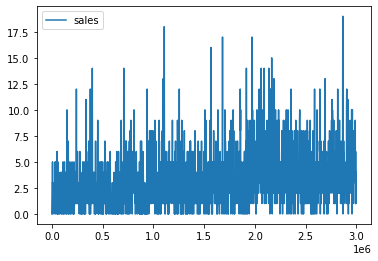

In [19]:
store1_automotive[['date','sales']].plot()

In [20]:
store1_automotive['date'] = pd.to_datetime(store1_automotive['date'])

C:\Users\Akhil_S_Bhat\AppData\Local\Temp\ipykernel_36292\1409006241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_automotive['date'] = pd.to_datetime(store1_automotive['date'])


In [21]:
store1_automotive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 2999106
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1684 non-null   int64         
 1   date         1684 non-null   datetime64[ns]
 2   store_nbr    1684 non-null   int64         
 3   family       1684 non-null   object        
 4   sales        1684 non-null   float64       
 5   onpromotion  1684 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 92.1+ KB


In [22]:
import matplotlib.pyplot as plt

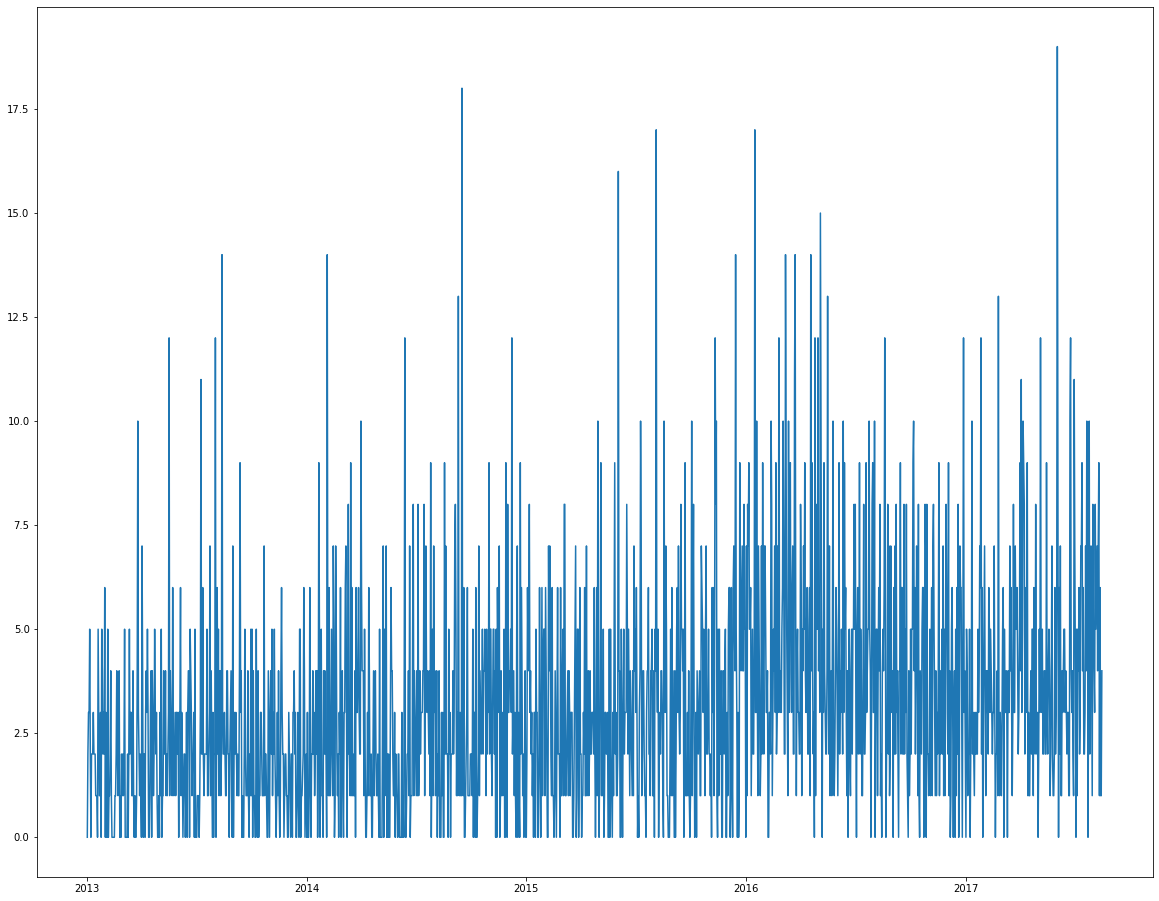

In [23]:
plt.figure(figsize=(20,16))
plt.plot(store1_automotive['date'],store1_automotive['sales'])
plt.show()

In [24]:
store_auto_2016 = store1_automotive[(store1_automotive['date']>='2016-01-01')&(store1_automotive['date']<'2017-01-01')]

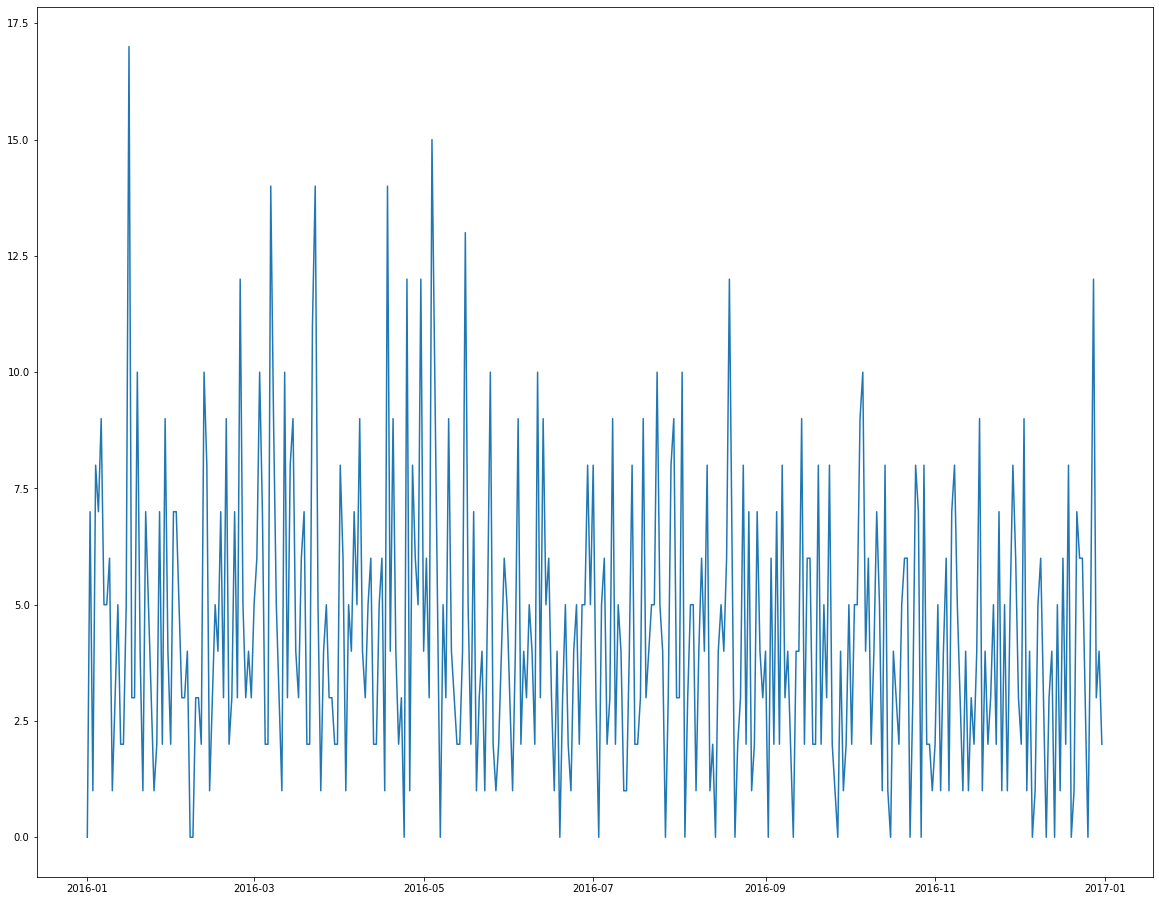

In [25]:
plt.figure(figsize=(20,16))
plt.plot(store_auto_2016['date'],store_auto_2016['sales'])
plt.show()

In [26]:
moving_avg = store_auto_2016['sales'].rolling(30).mean().fillna(method='bfill')

In [27]:
moving_avg.head(40)

1945944    4.800000
1947726    4.800000
1949508    4.800000
1951290    4.800000
1953072    4.800000
1954854    4.800000
1956636    4.800000
1958418    4.800000
1960200    4.800000
1961982    4.800000
1963764    4.800000
1965546    4.800000
1967328    4.800000
1969110    4.800000
1970892    4.800000
1972674    4.800000
1974456    4.800000
1976238    4.800000
1978020    4.800000
1979802    4.800000
1981584    4.800000
1983366    4.800000
1985148    4.800000
1986930    4.800000
1988712    4.800000
1990494    4.800000
1992276    4.800000
1994058    4.800000
1995840    4.800000
1997622    4.800000
1999404    4.866667
2001186    4.866667
2002968    5.066667
2004750    4.966667
2006532    4.833333
2008314    4.633333
2010096    4.600000
2011878    4.433333
2013660    4.233333
2015442    4.300000
Name: sales, dtype: float64

In [28]:
store_auto_2016['ma'] = moving_avg

C:\Users\Akhil_S_Bhat\AppData\Local\Temp\ipykernel_36292\64374485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_auto_2016['ma'] = moving_avg


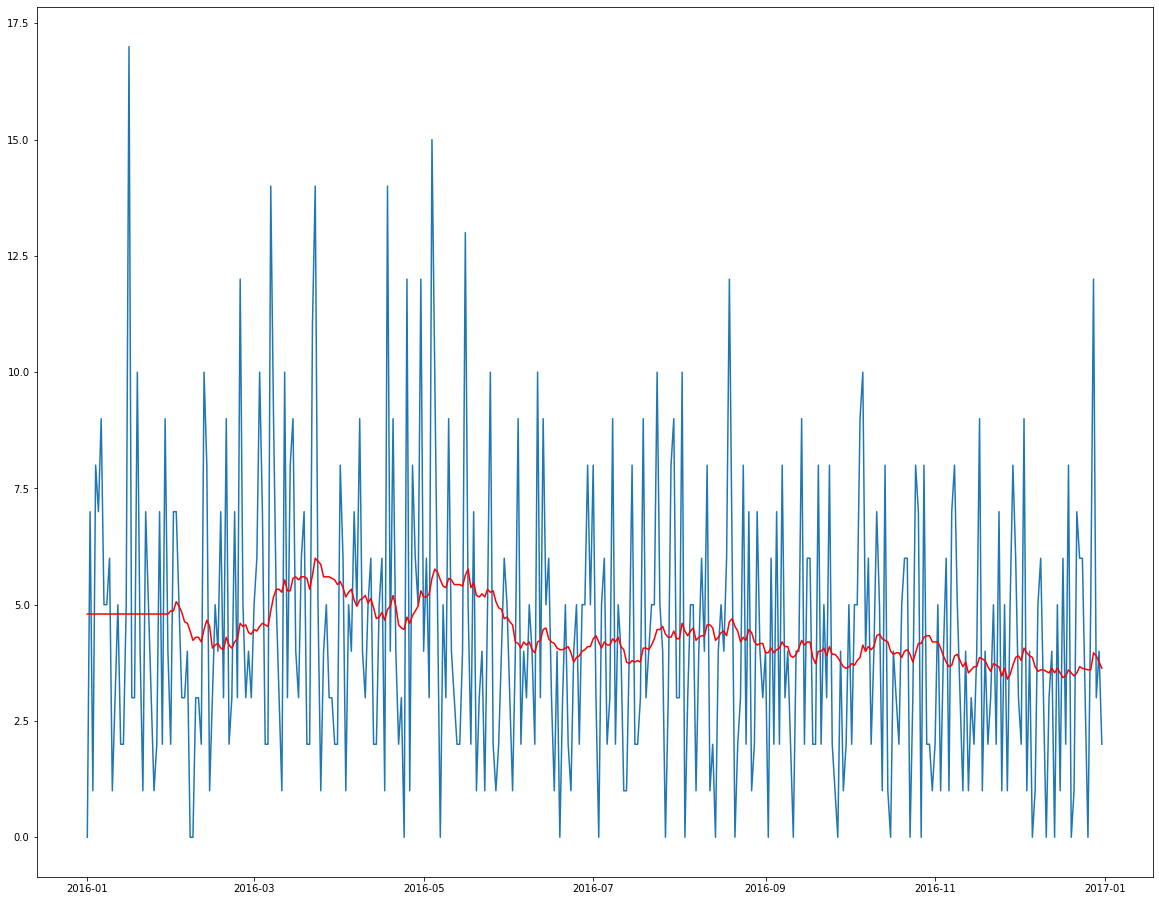

In [29]:
plt.figure(figsize=(20,16))
plt.plot(store_auto_2016['date'],store_auto_2016['sales'])
plt.plot(store_auto_2016['date'],store_auto_2016['ma'],color='red')
plt.show()

In [30]:
store_auto_2016

,id,date,store_nbr,family,sales,onpromotion,ma
1945944,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,4.800000
1947726,1947726,2016-01-02,1,AUTOMOTIVE,7.0,0,4.800000
1949508,1949508,2016-01-03,1,AUTOMOTIVE,1.0,0,4.800000
1951290,1951290,2016-01-04,1,AUTOMOTIVE,8.0,0,4.800000
1953072,1953072,2016-01-05,1,AUTOMOTIVE,7.0,0,4.800000
...,...,...,...,...,...,...,...
2587464,2587464,2016-12-27,1,AUTOMOTIVE,5.0,0,3.600000
2589246,2589246,2016-12-28,1,AUTOMOTIVE,12.0,0,3.966667
2591028,2591028,2016-12-29,1,AUTOMOTIVE,3.0,0,3.900000
2592810,2592810,2016-12-30,1,AUTOMOTIVE,4.0,0,3.766667


In [31]:
auto_2016 = store_auto_2016[['date','sales']]

In [32]:
auto_2016 = auto_2016.set_index(['date'])

In [33]:
auto_2016

,sales
date,
2016-01-01,0.0
2016-01-02,7.0
2016-01-03,1.0
2016-01-04,8.0
2016-01-05,7.0
...,...
2016-12-27,5.0
2016-12-28,12.0
2016-12-29,3.0


In [34]:
moving_avg = auto_2016.rolling(30).mean().fillna(method='bfill')

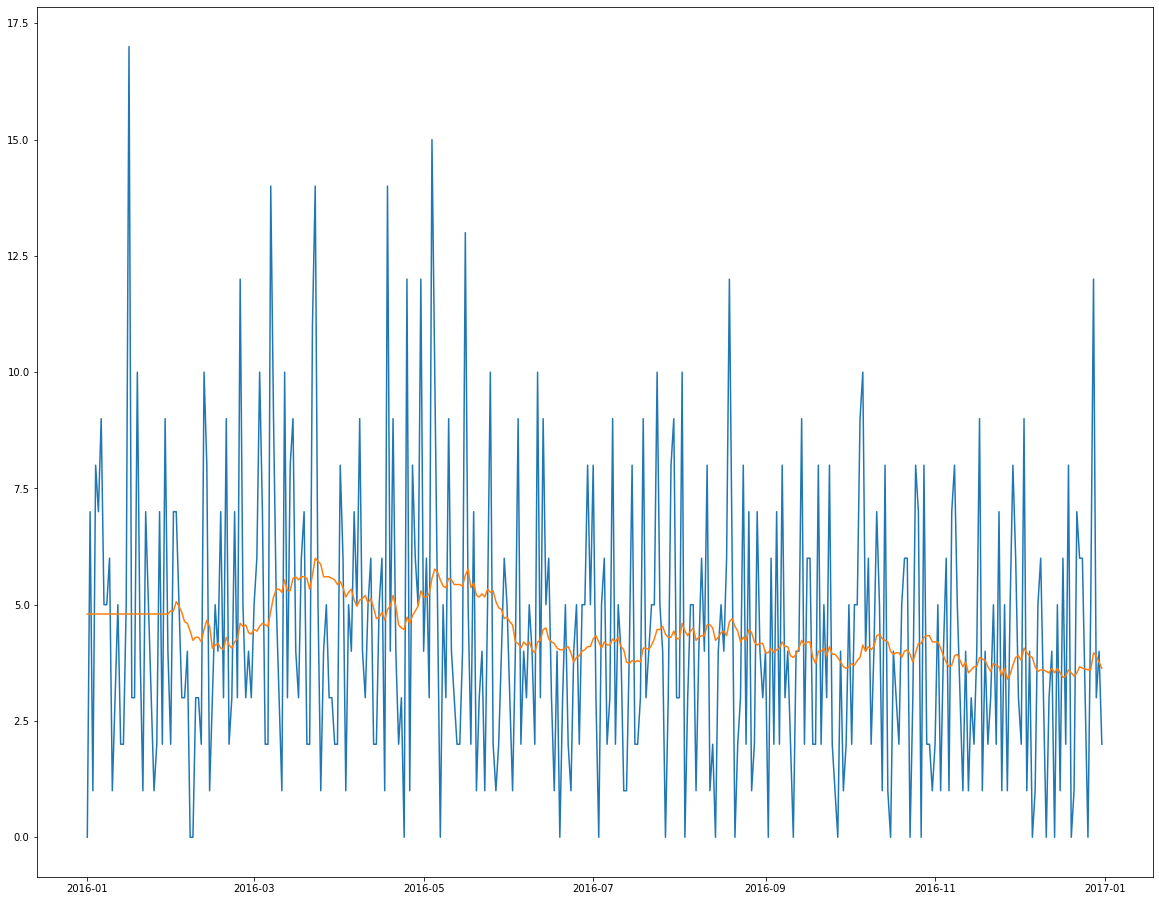

In [35]:
plt.figure(figsize=(20,16))
plt.plot(auto_2016)
plt.plot(moving_avg)
plt.show()

In [36]:
auto_2016 = auto_2016.asfreq(freq='D')
auto_2016.fillna(0,inplace=True)

In [37]:
auto_2016.sort_values('sales')

,sales
date,
2016-01-01,0.0
2016-10-16,0.0
2016-10-23,0.0
2016-10-27,0.0
2016-09-27,0.0
...,...
2016-04-18,14.0
2016-03-07,14.0
2016-03-23,14.0


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(auto_2016)

In [39]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

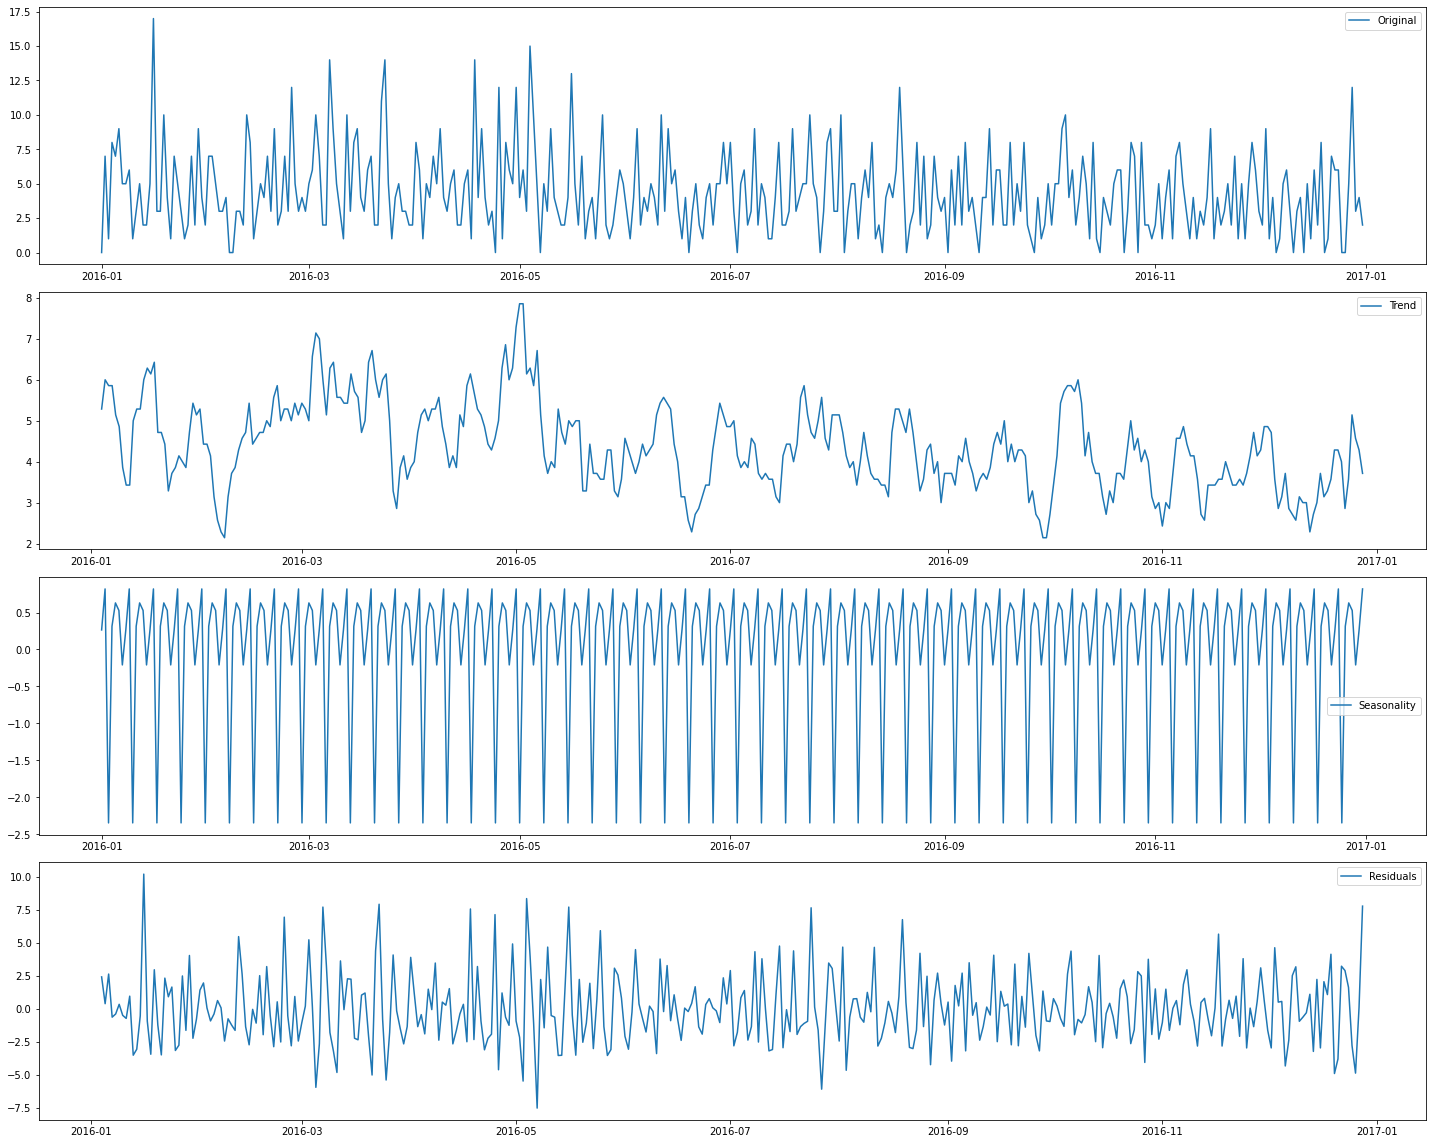

In [40]:
plt.figure(figsize=(20,16))
plt.subplot(411)
plt.plot(auto_2016, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [41]:
auto_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [42]:
from pmdarima.arima import auto_arima
import sklearn.metrics as skm
from sklearn.preprocessing import MinMaxScaler

In [43]:
auto_2016

,sales
date,
2016-01-01,0.0
2016-01-02,7.0
2016-01-03,1.0
2016-01-04,8.0
2016-01-05,7.0
...,...
2016-12-27,5.0
2016-12-28,12.0
2016-12-29,3.0


In [44]:
auto_arima(y=auto_2016,start_p=1,start_q=0,test='adf',error_action='ignore',trace=True,seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1859.891, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1858.166, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1859.845, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2265.357, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1860.536, Time=0.44 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.645 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima(y=auto_2016,start_p=1,start_q=0,test='adf',error_action='ignore',trace=True,seasonal=True)